In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

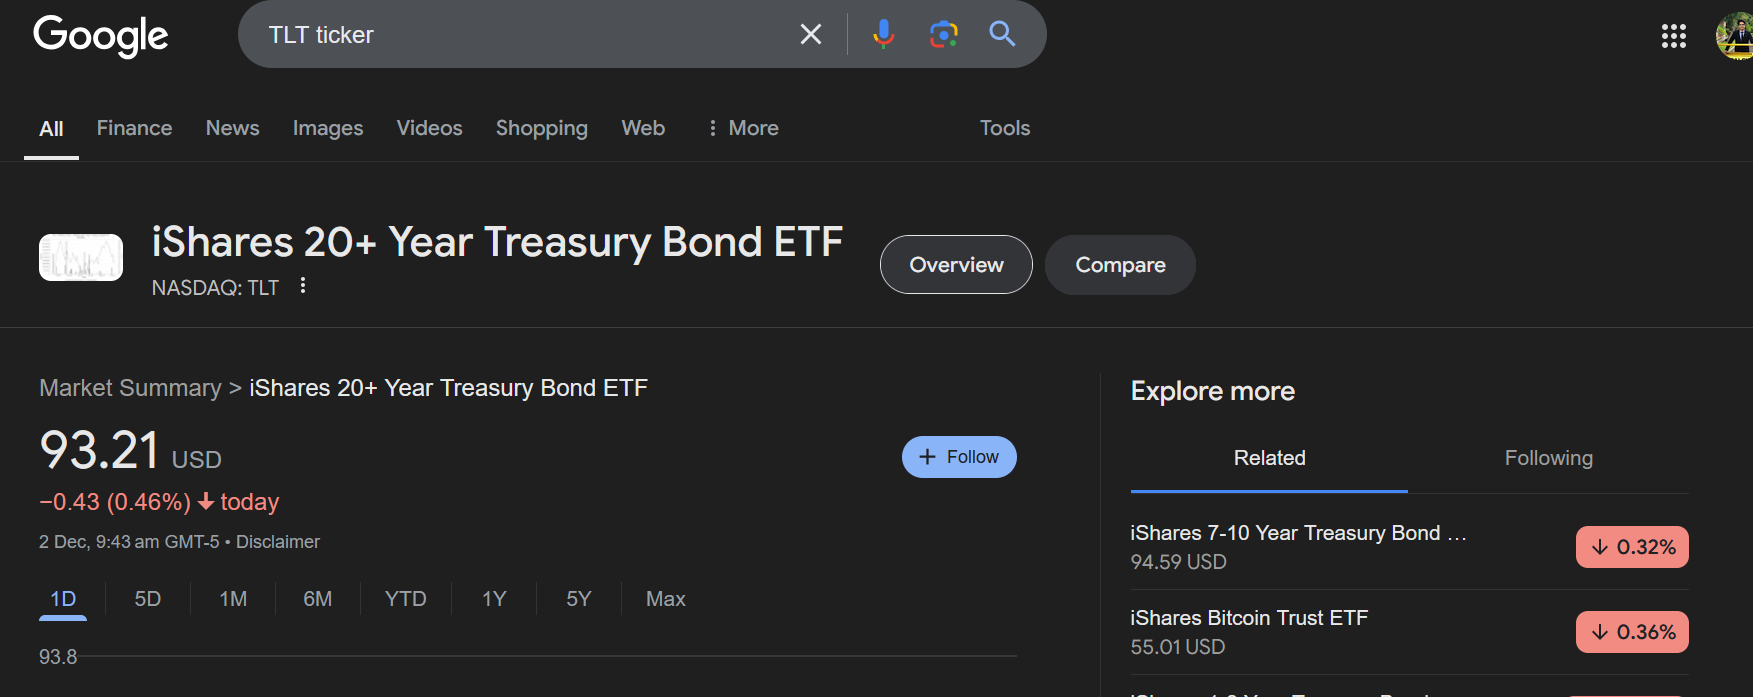

In [2]:
tlt = yf.download("TLT", start="2002-01-01", end="2024-06-30")
tlt["log_return"] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

[*********************100%***********************]  1 of 1 completed


In [19]:
############ Log Returns are addiditive in nature ##################

<Axes: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

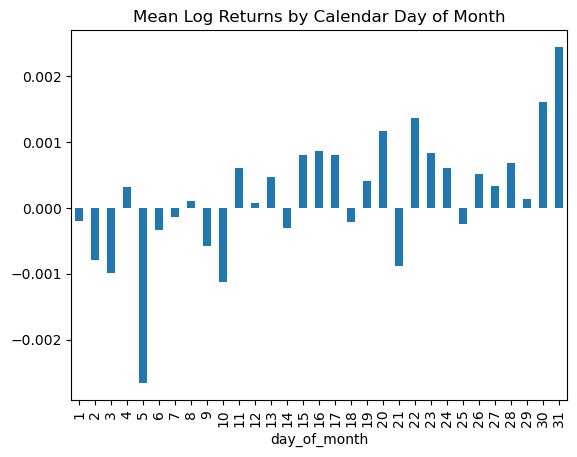

In [6]:
tlt["day_of_month"] = tlt.index.day
tlt["year"] = tlt.index.year
grouped_by_day = tlt.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

In [9]:
tlt.head()

Price,Adj Close,Close,High,Low,Open,Volume,log_return,day_of_month,year
Ticker,TLT,TLT,TLT,TLT,TLT,TLT,,,
Date,,,,,,,,,
2002-07-30 00:00:00+00:00,38.561543,81.519997,81.900002,81.519997,81.750000,6100,NaN,30,2002
2002-07-31 00:00:00+00:00,39.039268,82.529999,82.800003,81.900002,81.949997,29400,0.012313,31,2002
2002-08-01 00:00:00+00:00,39.261597,83.000000,83.019997,82.540001,82.540001,25000,0.005679,1,2002
2002-08-02 00:00:00+00:00,39.663685,83.849998,84.099998,82.879997,83.160004,52800,0.010189,2,2002
2002-08-05 00:00:00+00:00,39.838692,84.220001,84.440002,83.849998,84.040001,61100,0.004403,5,2002


In [10]:
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[tlt.day_of_month <= 7].log_return

tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[tlt.day_of_month >= 23].log_return

tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

In [13]:
tlt.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,log_return,day_of_month,year,first_week_returns,last_week_returns,last_week_less_first_week
Ticker,TLT,TLT,TLT,TLT,TLT,TLT,,,,,,
Date,,,,,,,,,,,,
2002-07-30 00:00:00+00:00,38.561543,81.519997,81.900002,81.519997,81.750000,6100,NaN,30,2002,0.000000,NaN,NaN
2002-07-31 00:00:00+00:00,39.039268,82.529999,82.800003,81.900002,81.949997,29400,0.012313,31,2002,0.000000,0.012313,0.012313
2002-08-01 00:00:00+00:00,39.261597,83.000000,83.019997,82.540001,82.540001,25000,0.005679,1,2002,0.005679,0.000000,-0.005679
2002-08-02 00:00:00+00:00,39.663685,83.849998,84.099998,82.879997,83.160004,52800,0.010189,2,2002,0.010189,0.000000,-0.010189
2002-08-05 00:00:00+00:00,39.838692,84.220001,84.440002,83.849998,84.040001,61100,0.004403,5,2002,0.004403,0.000000,-0.004403
2002-08-06 00:00:00+00:00,39.498142,83.500000,83.900002,83.220001,83.870003,64900,-0.008585,6,2002,-0.008585,0.000000,0.008585
2002-08-07 00:00:00+00:00,39.592739,83.699997,84.139999,83.360001,83.599998,40300,0.002392,7,2002,0.002392,0.000000,-0.002392
2002-08-08 00:00:00+00:00,39.592739,83.699997,83.769997,83.360001,83.580002,40900,0.000000,8,2002,0.000000,0.000000,0.000000


<Axes: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

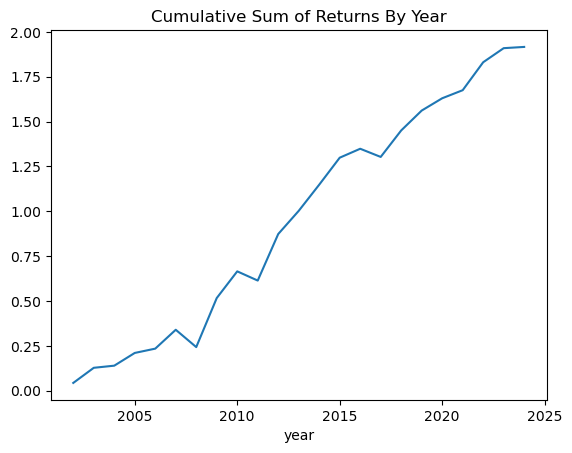

In [15]:
tlt.groupby("year").last_week_less_first_week.sum().cumsum().plot(title="Cumulative Sum of Returns By Year")

<Axes: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

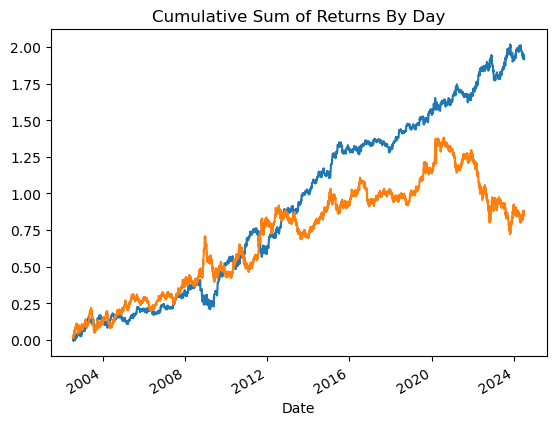

In [18]:
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")
tlt.log_return.cumsum().plot()